# Introduction: ARIMA model for price forecasting



Calculate expected return for a given period is essential in trading or investing as it will determine our strategy in optimization and risk management or even compare opportunity cost between different selection. 

In this notebook, we will deploy ARIMA model, which stands for AutoRegressive Integrated Moving Average. It is a time series forecasting model that incorporates autocorrelation measures to model temporal structures within the time series data to predict future values. 
 
 
Three factors define ARIMA model, it is defined as ARIMA(p,d,q) where p, d, and q denote the number of lagged (or past) observations to consider for autoregression, the number of times the raw observations are differenced, and the size of the moving average window respectively.




In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# plt.style.use('seaborn')
# # plt.style.use('seaborn-colorblind') #alternative
# plt.rcParams['figure.figsize'] = [20,12]
# plt.rcParams['figure.dpi'] = 300
# warnings.simplefilter(action='ignore', category=FutureWarning)


#Choosing paremeterst for ARIMA
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


# import data collection 
import sys
sys.path.append('../')
from data_collecetion import *

### Data collection

In [472]:
symbol = 'TCB'
start = '2020-09-14'
end = '2022-10-14'
stock = load_stock_data(symbol,start,end)
index = load_index_data('VNINDEX',start,end)

## Model construction - ARIMA

In [473]:
#load new dataframe

df_index = stock.index
df = pd.DataFrame(stock.close.values,columns=['value'])
df

,value
0,21400.0
1,21300.0
2,21800.0
3,22300.0
4,22350.0
...,...
516,25800.0
517,24000.0
518,24800.0
519,25300.0


### Examine the paremeter (p,d,q) for ARIMA model

In [424]:
#Examine d

d=0
adfuller_p_value = adfuller(df.dropna())
adfuller_p_value = adfuller_p_value[1]
if adfuller_p_value >0.05:
    d+=1
    adfuller_p_value = adfuller(df.diff().dropna())
    adfuller_p_value = adfuller_p_value[1]
    if adfuller_p_value >0.05:
        d+=1
        adfuller_p_value = adfuller(df.diff().dropna())
        adfuller_p_value = adfuller_p_value[1]

print('d = %s with p-value = %s'%(d,adfuller_p_value))

d = 0 with p-value = 0.03216645409908515


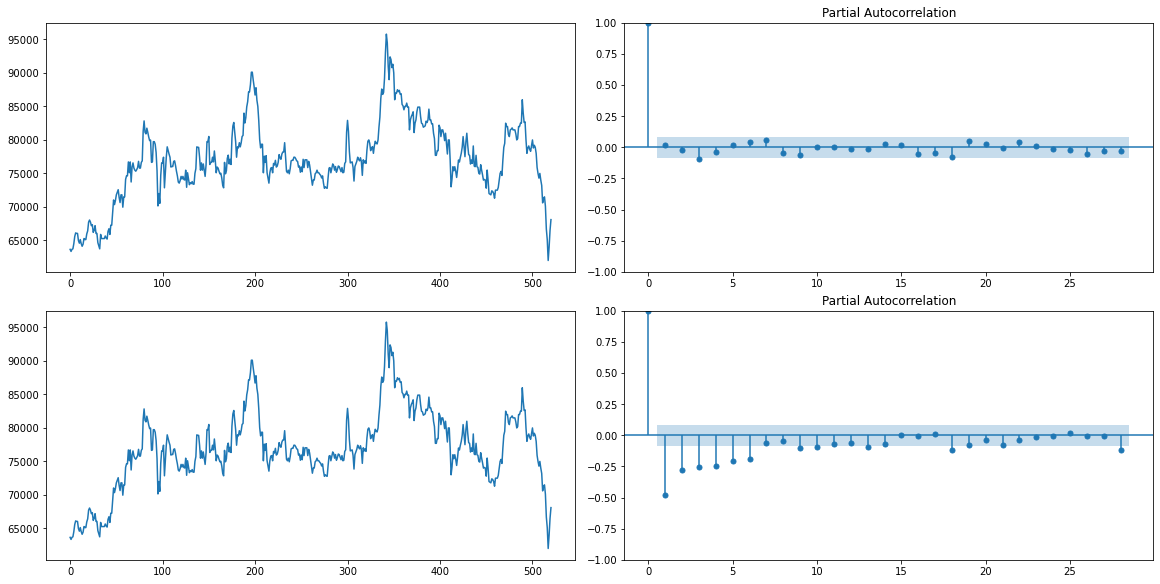

p will be 1


In [425]:
#Examine p

fix,(ax1,ax2)= plt.subplots(2,2,figsize=(16,8),constrained_layout = True)
ax1[0].plot(df.value)
plot_pacf(df.value.diff().dropna(),ax=ax1[1],method='ywm')
ax2[0].plot(df.value)
plot_pacf(df.value.diff().diff().dropna(),ax=ax2[1],method='ywm')
# fig.tight_layout()
plt.show()
print('p will be 1')

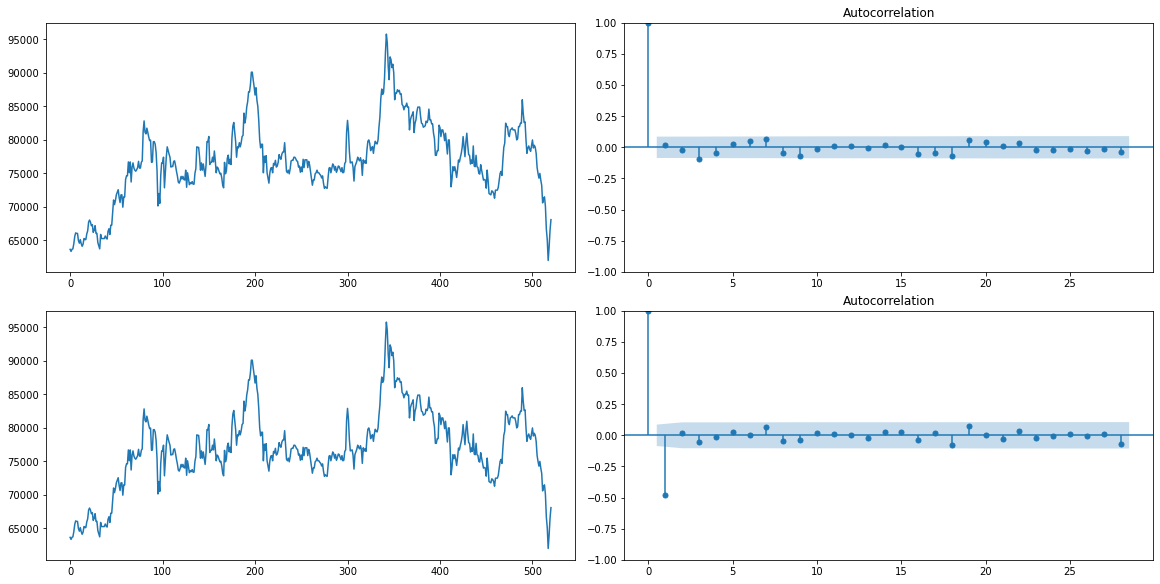

q will be 1


In [426]:
#Examine q

fig1,(ax3,ax4)= plt.subplots(2,2,figsize=(16,8),constrained_layout = True)
ax3[0].plot(df.value)
plot_acf(df.value.diff().dropna(),ax=ax3[1])
ax4[0].plot(df.value)
plot_acf(df.value.diff().diff().dropna(),ax=ax4[1])
# fig.tight_layout()
plt.show()
print('q will be 1')

### Hence, for our model is ARIMA(1,1,1)

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  521
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4490.680
Date:                Wed, 19 Oct 2022   AIC                           8987.360
Time:                        10:27:22   BIC                           9000.121
Sample:                             0   HQIC                          8992.359
                                - 521                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0014     14.671   9.33e-05      1.000     -28.753      28.756
ma.L1          0.0014     14.672   9.29e-05      1.000     -28.756      28.759
sigma2      1.863e+06   8.93e+04     20.863      0.0

/Users/haquochung/opt/anaconda3/envs/CV_portfolio/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/haquochung/opt/anaconda3/envs/CV_portfolio/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


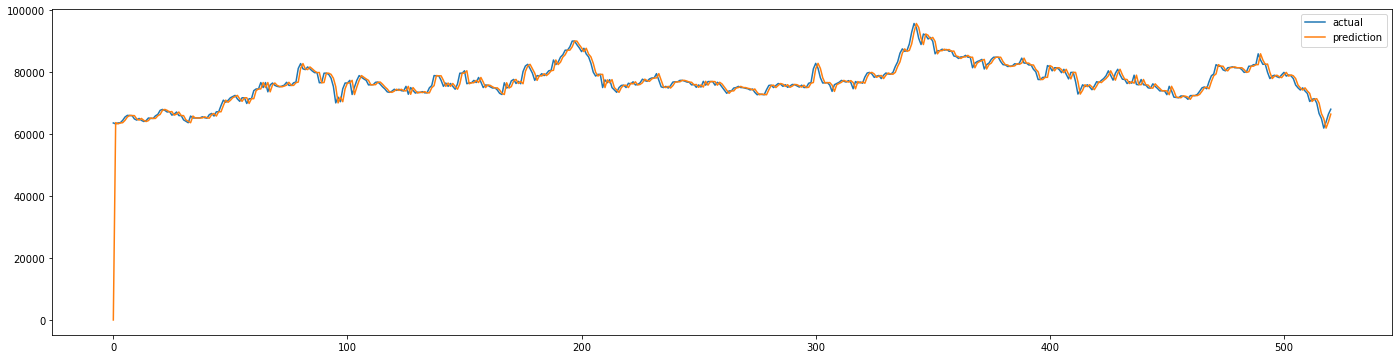

In [458]:
## Fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# arima_model = sm.tsa.ARIMA(df.values,order=(1,2,1))

arima_model = ARIMA(df.value,order=(1,1,1))
model = arima_model.fit()
print(model.summary())

fig,ax = plt.subplots(figsize=(24,6))
prediction = model.predict()
ax.plot(df,label='actual')
ax.plot(prediction,label='prediction')

plt.legend()
plt.show()

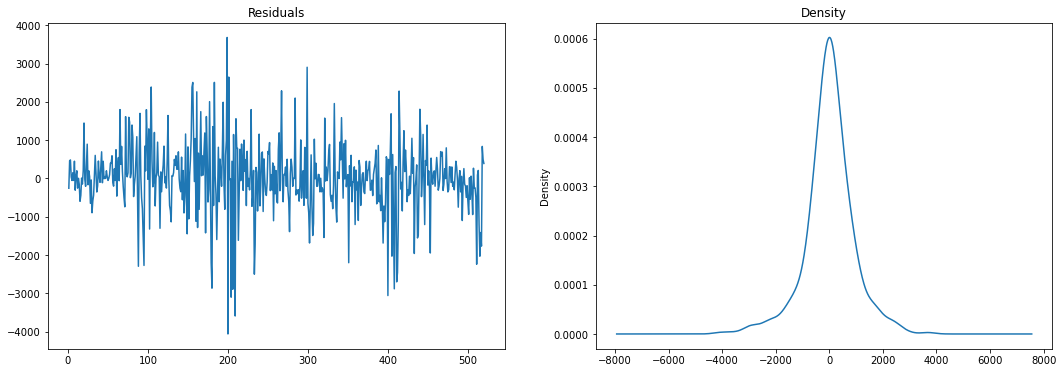

In [398]:
residuals = model.resid[1:]
fig, ax = plt.subplots(1,2,figsize =(18,6))
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

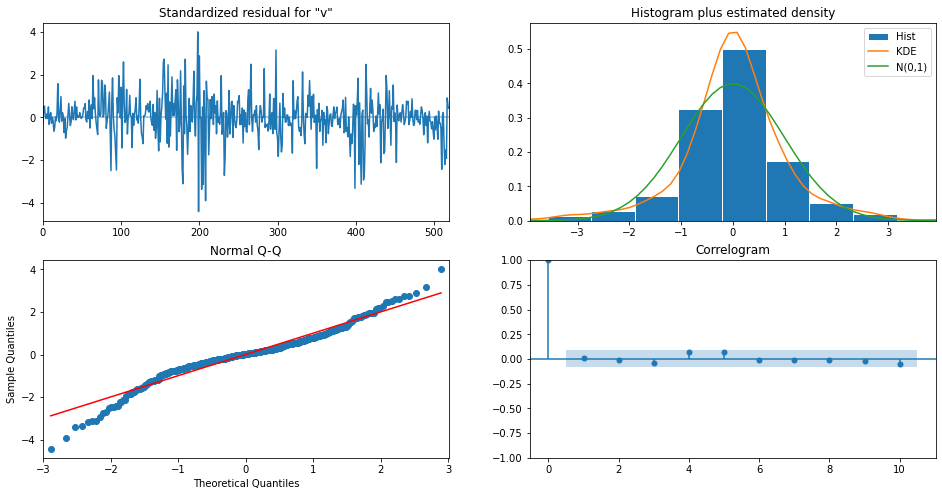

In [399]:
model.plot_diagnostics(figsize = (16,8))
plt.show()

In [478]:
df_train = df[:int(df.value.count()*85/100)] 
df_test = df[int(df.value.count()*85/100):] 

arima_model = ARIMA(df_train,order=(1,0,1))
model = arima_model.fit()
print(model.summary())


# fig,ax = plt.subplots(figsize=(24,6))
# prediction = model.predict()
# # prediction = model.simulate(nsimulations=200)


# ax.plot(df_train,label='actual')
# ax.plot(prediction,label='prediction')

# plt.legend()
# plt.show()

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  442
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3661.721
Date:                Wed, 19 Oct 2022   AIC                           7331.443
Time:                        11:04:04   BIC                           7347.808
Sample:                             0   HQIC                          7337.898
                                - 442                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.254e+04   9867.714      4.311      0.000    2.32e+04    6.19e+04
ar.L1          0.9973      0.004    265.715      0.000       0.990       1.005
ma.L1          0.0047      0.033      0.141      0.8

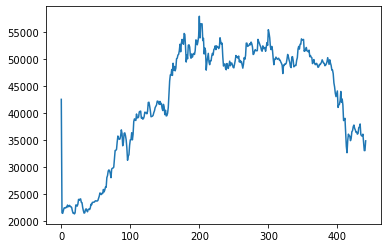

In [479]:
plt.plot(model.predict())

In [480]:
y_pred = pd.Series(model.predict(start =df_test.index[0],end=df_test.index[-1]))
y_pred

442    35972.993129
443    35990.692750
444    36008.344639
445    36025.948925
446    36043.505735
           ...     
516    37161.799866
517    37176.293519
518    37190.748084
519    37205.163669
520    37219.540378
Name: predicted_mean, Length: 79, dtype: float64

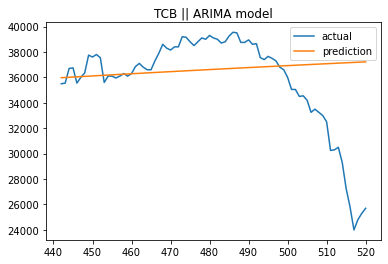

In [481]:
plt.plot(df_test,label ='actual')
plt.plot(y_pred,label='prediction')
plt.title(symbol+' || ARIMA model')
plt.legend()
plt.show()

In [202]:
print(model.param_names,'\n',model.param_terms,'\n',model.params)

['const', 'ar.L1', 'ma.L1', 'sigma2'] 
 ['exog', 'ar', 'ma', 'variance'] 
 const     5.600247e+04
ar.L1     9.963394e-01
ma.L1     2.086520e-02
sigma2    1.615823e+06
dtype: float64


In [205]:
model_const,model_ar,model_sigma = model.params.const,model.params['ar.L1'],model.params.sigma2

In [198]:
params_list = list(model.params)
params_list

[56002.46819916873,
 0.9963394383263969,
 0.02086520034357268,
 1615822.8857962566]

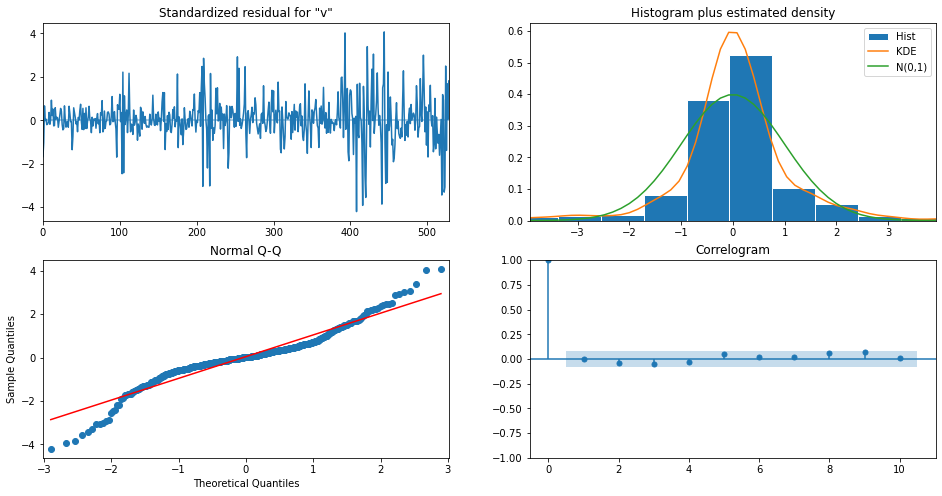

In [136]:
model.plot_diagnostics(figsize = (16,8))
plt.show()

In [141]:
prediction = model.simulate(nsimulations=3)
prediction

0    54223.691306
1    53153.552932
2    52924.852544
Name: value, dtype: float64